TASK 1 - IRIS FLOWER CLASSIFICATION


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('/content/Iris.csv')  # Make sure the file is in the same directory

In [ ]:
# Step 2: Explore the data
print(df.head())
print(df.describe())
print(df['Species'].value_counts())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

In [ ]:
# Step 3: Drop unnecessary columns if any
df.drop('Id', axis=1, inplace=True)

In [ ]:
# Step 4: Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Setosa=0, Versicolor=1, Virginica=2

In [ ]:
# Step 5: Split into features and labels
X = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Train a classification model (Random Forest used here)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Step 8: Predict on test set
y_pred = model.predict(X_test)

In [ ]:
# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



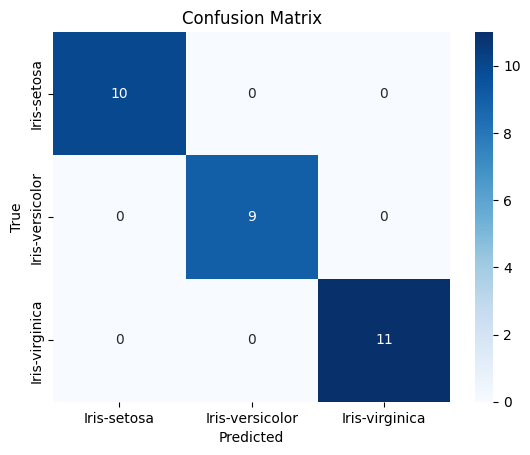

In [ ]:
# Step 10: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load the dataset
df1 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
# Step 3: Inspect data
print(df1.head())
print(df1.info())
print(df1.isnull().sum())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [ ]:
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1 = df1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

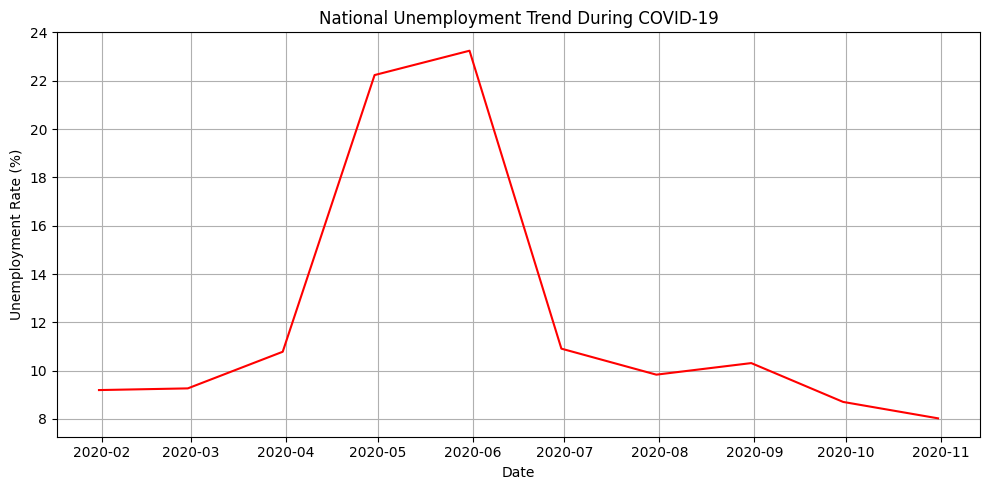

In [ ]:
# Step 6: National-level trend
df_national = df1.groupby('Date')[
    ['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']
].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_national, x='Date', y='Unemployment_Rate', color='red')
plt.title("National Unemployment Trend During COVID-19")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

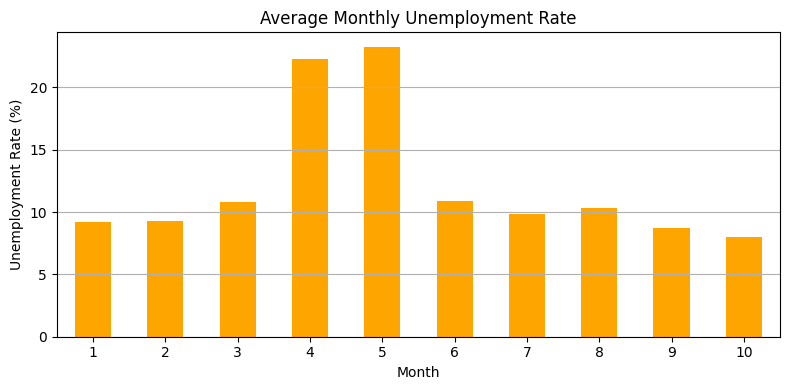

In [ ]:
# Step 7: Month-wise average unemployment
df1['Month'] = df1['Date'].dt.month
monthly_avg = df1.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(8, 4))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Average Monthly Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

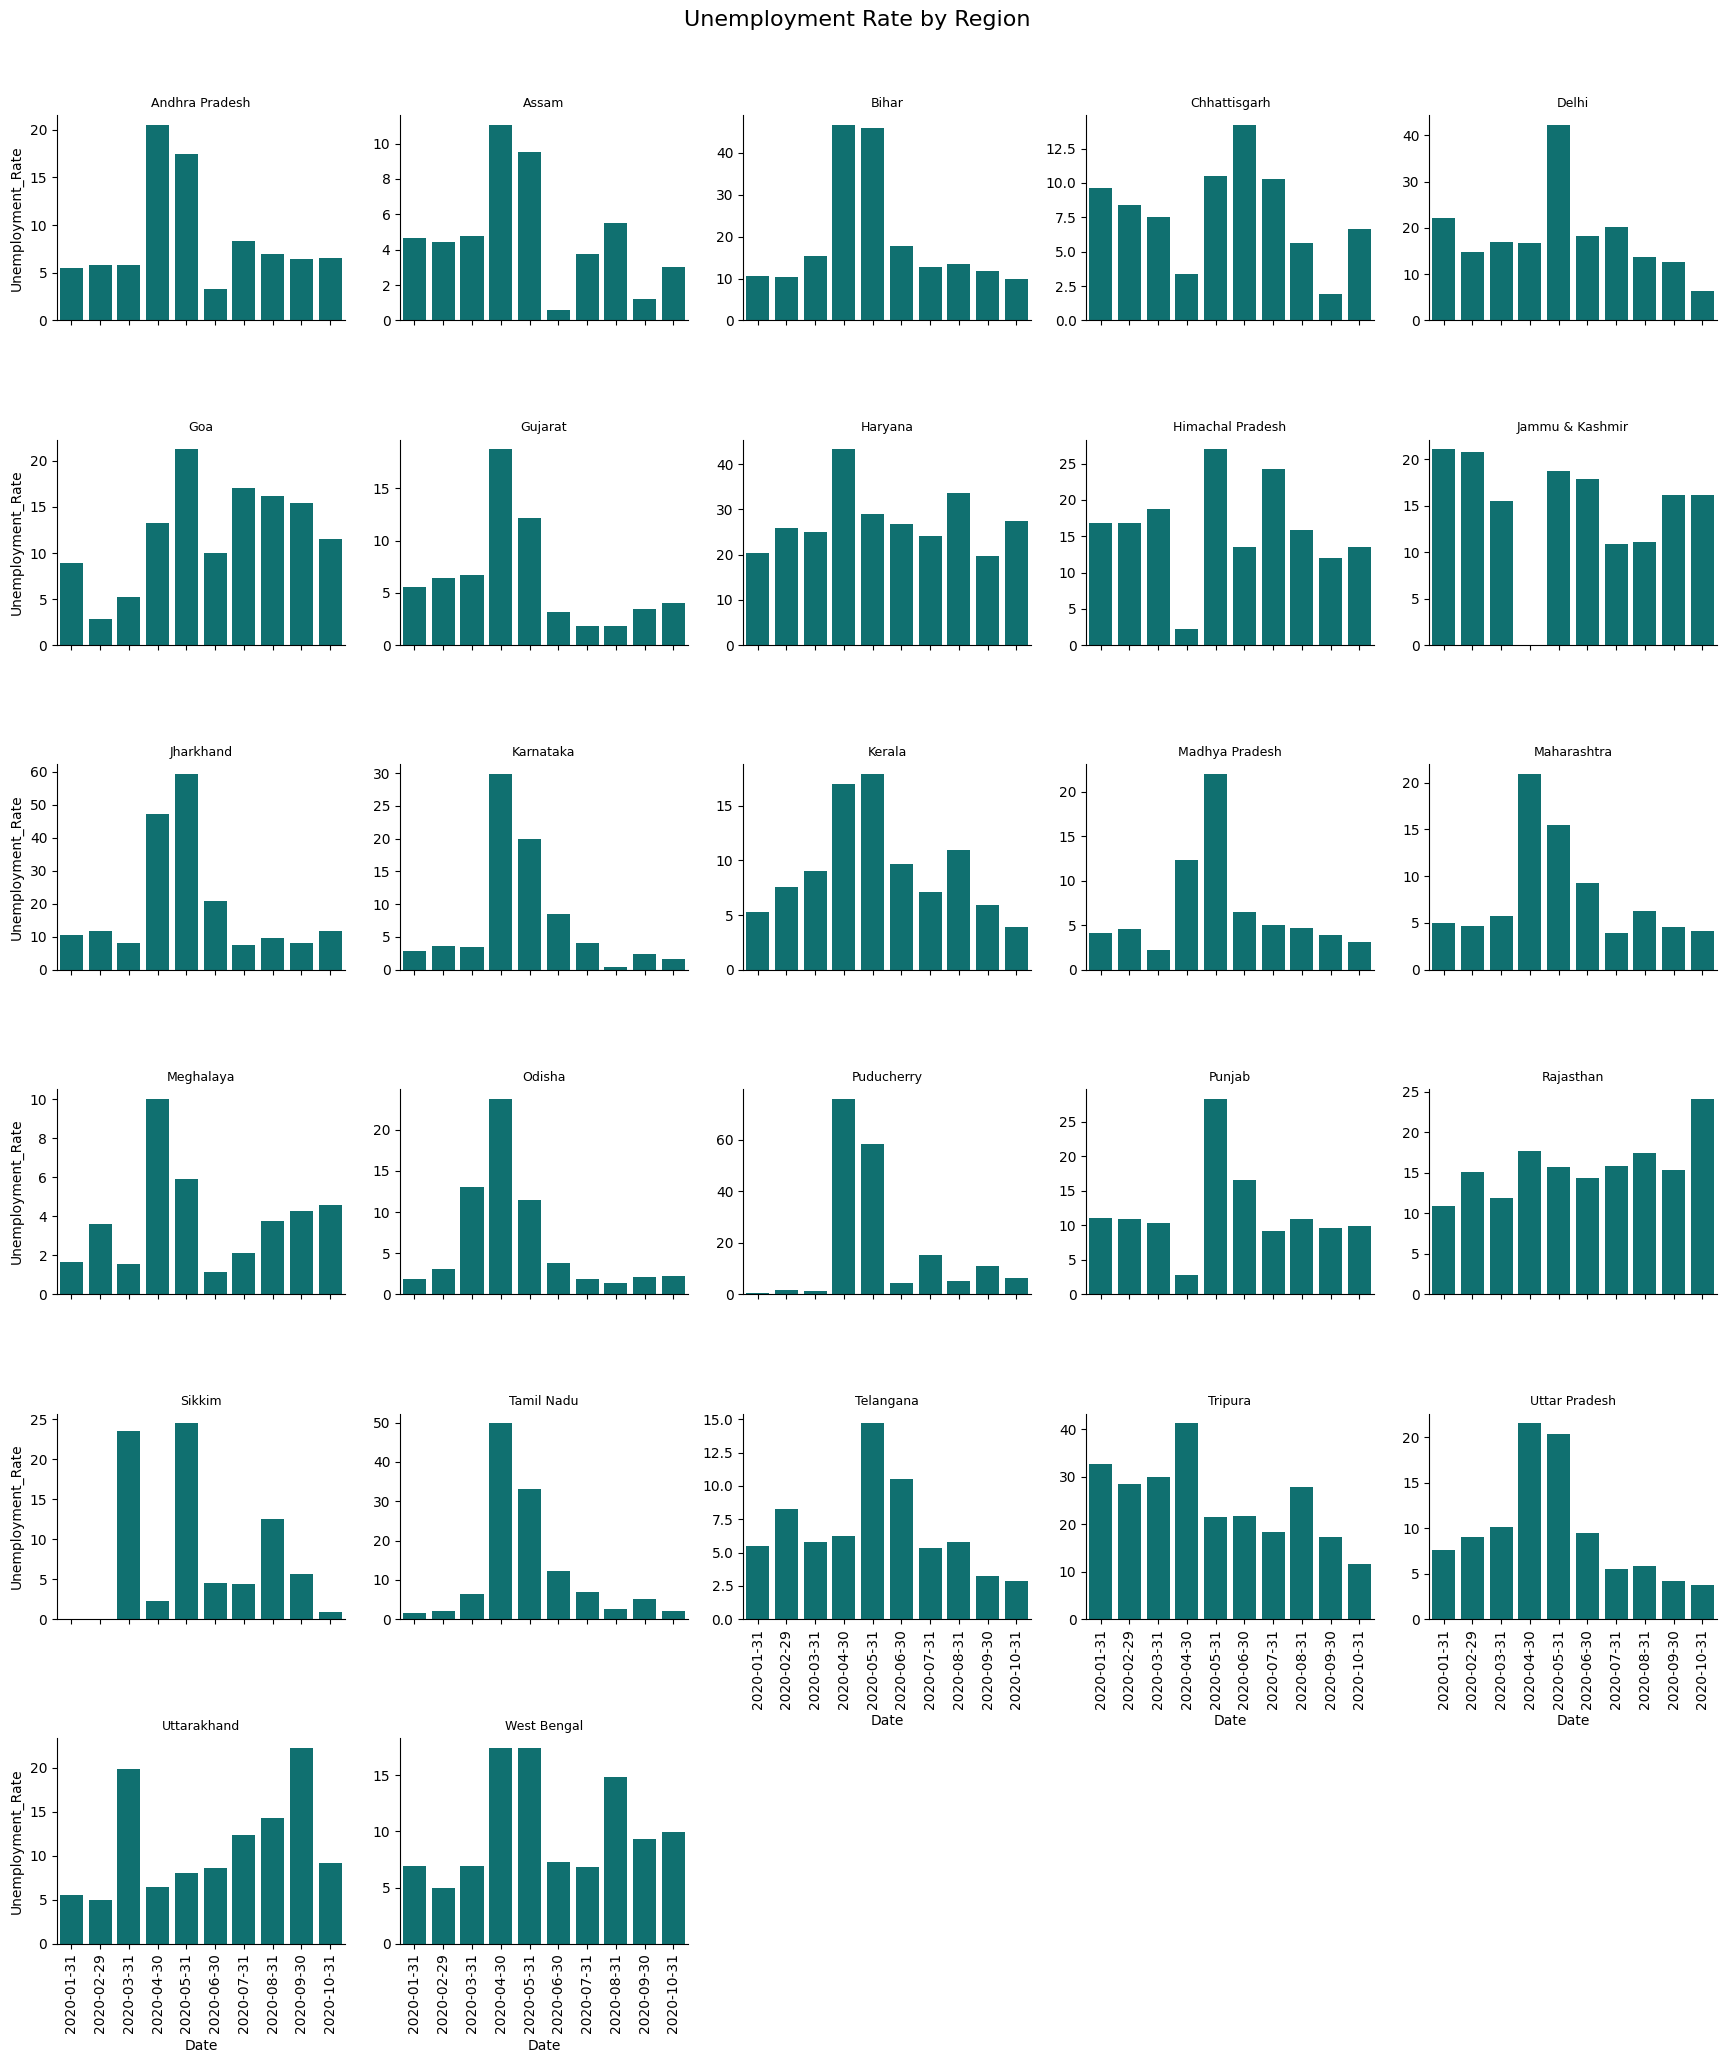

In [ ]:
# Ensure column names are stripped and consistent
df1.columns = df1.columns.str.strip()

# Renaming
df1 = df1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Region': 'Region',  # Ensure Region exists
    'Date': 'Date'
})

# Convert date
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

# Now plot
g = sns.FacetGrid(df1, col='Region', col_wrap=5, height=3.5, sharey=False)
g.map_dataframe(sns.barplot, x='Date', y='Unemployment_Rate', color='teal')
g.set_titles(col_template="{col_name}", size=9)

# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

g.fig.suptitle("Unemployment Rate by Region", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Load the dataset
df2 = pd.read_csv("/content/car_Data.csv")
df2.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Step 3: Preprocessing
df2 = df2.copy()
df2['Car_Age'] = 2025 - df2['Year']  # Convert Year to Age
df2.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop unused columns

# Encode categorical columns
le = LabelEncoder()
df2['Fuel_Type'] = le.fit_transform(df2['Fuel_Type'])
df2['Selling_type'] = le.fit_transform(df2['Selling_type'])
df2['Transmission'] = le.fit_transform(df2['Transmission'])

# Confirm processed dataset
df2.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [ ]:
# Step 4: Define features and target
X = df2.drop('Selling_Price', axis=1)
y = df2['Selling_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
# Step 6: Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9592683769360726
RMSE: 0.9686468632776881


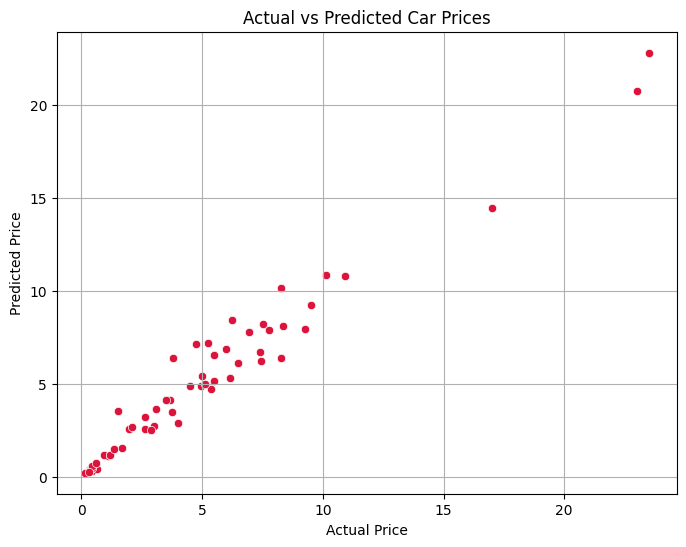

In [ ]:
# Step 7: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='crimson')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


TASK 4 - SALES PREDICTION USING PYTHON DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Load dataset
df3 = pd.read_csv("/content/Advertising.csv")
df3.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df3.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
# Step 2: Explore data
print(df3.head())
print(df3.describe())
print(df3.isnull().sum())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


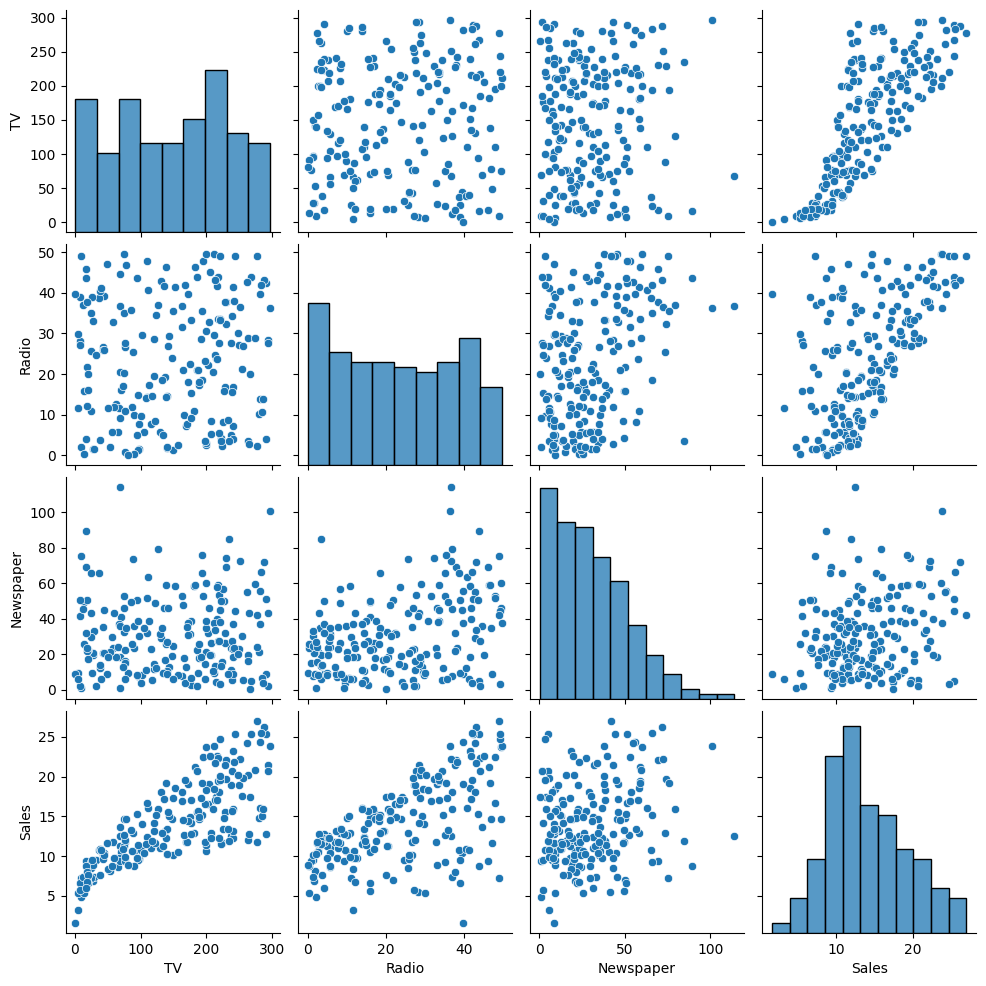

In [ ]:
# Step 3: Visualize relationships
sns.pairplot(df3)
plt.show()

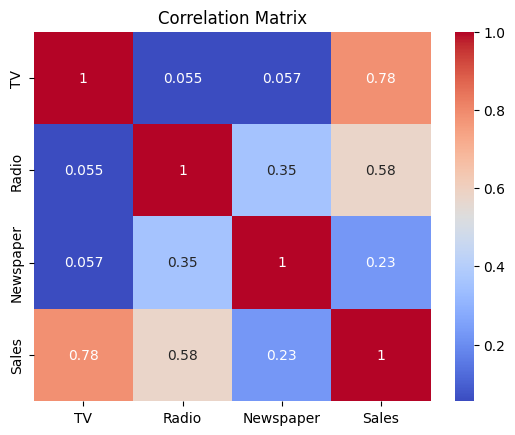

In [ ]:
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 4: Prepare data
X = df3.drop('Sales', axis=1)
y = df3['Sales']

In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict & Evaluate
y_pred = model.predict(X_test)

In [ ]:
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: 0.8994
RMSE: 1.7816


In [ ]:
# Step 8: Analyze coefficients (impact of ad spends)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


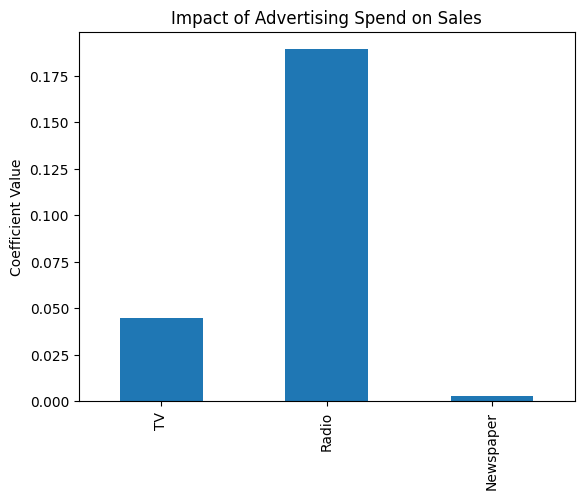

In [ ]:
# Visualize impact of each advertising medium
coeff_df.plot(kind='bar', legend=False)
plt.title("Impact of Advertising Spend on Sales")
plt.ylabel("Coefficient Value")
plt.show()